In [1]:
# Step 1: Install PuLP (only needed in Colab or if not installed)
!pip install pulp


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 86.6 MB/s eta 0:00:00


In [2]:
# Step 2: Import Libraries
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, value
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#  Step 3: Define the Optimization Problem
# Create a linear programming maximization problem
model = LpProblem("Maximize_Profit", LpMaximize)

# Define decision variables (number of units to produce)
x = LpVariable("Product_A", lowBound=0, cat='Continuous')  # Units of Product A
y = LpVariable("Product_B", lowBound=0, cat='Continuous')  # Units of Product B

# Objective Function: Maximize profit
model += 40 * x + 30 * y, "Total_Profit"

# Constraints
model += 3 * x + 2 * y <= 120, "Machine_1_Time"
model += 2 * x + y <= 100, "Machine_2_Time"

In [4]:
#  Step 4: Solve the Model
model.solve()

1

In [6]:
#  Step 5: Display Results
from pulp import LpStatus
print("======== Optimization Result ========")
print(f"Status: {LpStatus[model.status]}")
print(f"Optimal units of Product A to produce: {x.varValue}")
print(f"Optimal units of Product B to produce: {y.varValue}")
print(f"Maximum Profit: ${value(model.objective)}")

======== Optimization Result ========
Status: Optimal
Optimal units of Product A to produce: 0.0
Optimal units of Product B to produce: 60.0
Maximum Profit: $1800.0


In [7]:
#  Step 6: Machine Time Usage
used_machine_1 = 3 * x.varValue + 2 * y.varValue
used_machine_2 = 2 * x.varValue + y.varValue
print("\n======== Machine Time Utilization ========")
print(f"Machine 1 Time Used: {used_machine_1} / 120")
print(f"Machine 2 Time Used: {used_machine_2} / 100")


======== Machine Time Utilization ========
Machine 1 Time Used: 120.0 / 120
Machine 2 Time Used: 60.0 / 100



Generating Feasible Region Plot...


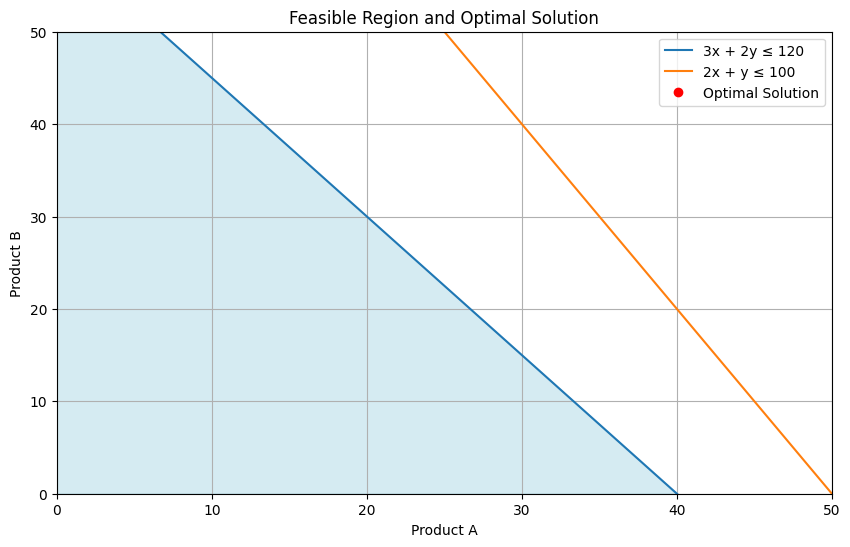

In [8]:
#  Step 7: Optional Visualization of Feasible Region
print("\nGenerating Feasible Region Plot...")

x_vals = np.linspace(0, 50, 400)
y1 = (120 - 3 * x_vals) / 2  # from 3x + 2y <= 120
y2 = (100 - 2 * x_vals)      # from 2x + y <= 100

plt.figure(figsize=(10,6))
plt.plot(x_vals, y1, label='3x + 2y ≤ 120')
plt.plot(x_vals, y2, label='2x + y ≤ 100')

# Shade the feasible region
plt.fill_between(x_vals, np.minimum(y1, y2), where=(y1 > 0) & (y2 > 0), color='lightblue', alpha=0.5)

# Plot optimal solution
plt.plot(x.varValue, y.varValue, 'ro', label='Optimal Solution')
plt.xlabel('Product A')
plt.ylabel('Product B')
plt.title('Feasible Region and Optimal Solution')
plt.legend()
plt.grid(True)
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.show()